In [ ]:
!nvidia-smi

Wed Jun  2 16:45:06 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P0    40W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0


In [ ]:
import torch
torch.cuda.get_device_name(0)

'Tesla P100-PCIE-16GB'

In [ ]:
# # !pip install gdown 
# import gdown

In [ ]:
# # !gdown https://drive.google.com/file/d/1EmW0PG6isXWm23khxBKbXkMRVQ0aCBlF/ view?usp=sharing
# !gdown https://drive.google.com/uc?id=1EmW0PG6isXWm23khxBKbXkMRVQ0aCBlF

Downloading...
From: https://drive.google.com/uc?id=1EmW0PG6isXWm23khxBKbXkMRVQ0aCBlF
To: /content/imbalanced-dataset-sampler-master.zip
100% 297k/297k [00:00<00:00, 105MB/s]


In [ ]:
# import zipfile

# with zipfile.ZipFile("imbalanced-dataset-sampler-master.zip","r") as zip_ref:
#     zip_ref.extractall("torchloader")

In [2]:
# import necessary libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random
import time
import copy
import tqdm
from tqdm import tqdm

from PIL import Image
import numpy

import torchvision
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.utils.data
import torch.nn.functional as F
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, Dataset, TensorDataset
import torch.optim as optim
from torch.utils.data.sampler import SubsetRandomSampler, WeightedRandomSampler
#from torchsampler import ImbalancedDatasetSampler

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import glob
import shutil
import os
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter
from IPython.display import display, clear_output
import pandas as pd
import time
import json

from itertools import product
from collections import namedtuple
from collections import OrderedDict

from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
#from resources.plotcm import plot_confusion_matrix

#print(os.listdir("../input"))


In [ ]:
# https://drive.google.com/file/d/1qvzmxXYktM5t7R1XI7p4G_RQP8G0TH3r/view?usp=sharing

In [ ]:
# !gdown https://drive.google.com/uc?id=1qvzmxXYktM5t7R1XI7p4G_RQP8G0TH3r

In [ ]:
# import zipfile

# with zipfile.ZipFile("imbalanced-dataset-sampler-master.zip","r") as zip_ref:
#     zip_ref.extractall("torchloader")

In [12]:
train_dir = '/content/drive/MyDrive/Projects/capstone/isic1920/train'
valid_dir = '/content/drive/MyDrive/Projects/capstone/isic1920/test'

In [ ]:
# for i in range(100):
#   file = random.choice([x for x in os.listdir(mel_dir)
#                if os.path.isfile(os.path.join(mel_dir, x))])
#   source = mel_dir + file 
#   dest = root_dir + "valid/" + file 
#   shutil.move(source, dest)

In [ ]:
# for i in tqdm(range(800)):
#   file = random.choice([x for x in os.listdir(nmel_dir)
#                if os.path.isfile(os.path.join(nmel_dir, x))])
#   source = nmel_dir + file 
#   dest = root_dir + "valid/not_melanoma/" + file 
#   shutil.move(source, dest)

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
class AdjustGamma(object):
    def __call__(self, img):
        return transforms.functional.adjust_gamma(img, 0.8, gain=1)
    
class AdjustContrast(object):
    def __call__(self, img):
        return transforms.functional.adjust_contrast(img, 2)
    
class AdjustBrightness(object):
    def __call__(self, img):
        return transforms.functional.adjust_brightness(img, 2)

In [13]:
def load_data(train_dir, valid_dir):
    
    """
    Function to obtain the dataloaders and the class_to_index mapping.
    Inputs:
        train and valid directories.
    Outputs:
        trainloader, validloader, and train_dataset.class_to_index
    """
  
    
    
    # Now we can define the transforms to perform in training, validation and testing
    train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                           transforms.RandomResizedCrop(224),
                                           transforms.RandomHorizontalFlip(),
                                           transforms.RandomVerticalFlip(),
                                            # AdjustGamma(),
                                            # AdjustContrast(),
                                           transforms.ToTensor(),
                                           transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])])
    valtest_transforms = transforms.Compose([transforms.Resize(255),
                                             transforms.CenterCrop(224),
                                             transforms.ToTensor(),
                                             transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])])
    
    # Obtain the datasets with ImageFolder
    try:
        train_dataset = datasets.ImageFolder(train_dir, transform = train_transforms)
        valid_dataset = datasets.ImageFolder(valid_dir, transform=valtest_transforms)
        #test_dataset = datasets.ImageFolder(test_dir, transform=valtest_transforms)
    except FileNotFoundError:
        print('The datadir introduced does not fit the expected model (datadir/train, datadir/valid)')
        print('Please introduce another directory')
      

    
    # labels = np.array(train_dataset.samples)[:,1]
    # labels = labels.astype(int)

    # # class_weights = [num_samples/class_counts[i] for i in range(len(class_counts))]
    # # weights = [class_weights[labels[i]] for i in range(int(num_samples))]

    # majority_weight = 1/25706
    # minority_weight = 1/468
    # samples_weights = np.array([majority_weight, minority_weight])
    # weights = samples_weights[labels]
    # #sampler = WeightedRandomSampler(torch.DoubleTensor(weights), int(num_samples))

    # sampler = WeightedRandomSampler(weights=weights, num_samples=len(weights), replacement=True)
            
    # Obtain the dataloaders
    trainloader = torch.utils.data.DataLoader(train_dataset, shuffle=True, batch_size=32)#, sampler=ImbalancedDatasetSampler(train_dataset), batch_size=32)
    validloader = torch.utils.data.DataLoader(valid_dataset, shuffle=True, batch_size=32)
    
    
    return trainloader, validloader, train_dataset.class_to_idx
    

In [14]:

trainloader, validloader,  class_idx = load_data(train_dir, valid_dir)


In [15]:
len(trainloader), len(validloader)

(291, 68)

In [ ]:
# from collections import Counter
# dict(Counter(trainloader.dataset.targets))

{0: 25706, 1: 468}

In [16]:
class MyClassifier(nn.Module):
    """
    Fully conneceted classifier we will train to predict if a skin mole or lesion is melanoma from images
    Inputs:
        input_size: Depending on the model
        output_size: Depending on the problem (2 classes in this case)
        hidden_layers: The user can choose the number of ReLU hidden layers.
        dropout_p: Probability of dropout.
    """
    def __init__(self, input_size, output_size, hidden_layers,dropout_p):
        super().__init__()
        # The first layer 
        self.hidden_layers = nn.ModuleList([nn.Linear(input_size, hidden_layers[0])])
        # We pair the rest of the layers and define them
        paired_layers = zip(hidden_layers[:-1], hidden_layers[1:])
        for p1,p2 in paired_layers:
            self.hidden_layers.append(nn.Linear(p1,p2))
        # Define the output layer
        self.output_layer = nn.Linear(hidden_layers[-1],output_size)

        # Define that we will be using dropout - We will also check that it is between 0 and 1
        try:
            self.dropout = nn.Dropout(p=dropout_p)
        except ValueError:
            print("The dropout probability has to be between 0 and 1 amd got ",dropout_p)
            print("Please introduce a valid p")
            sys.exit("Program terminating.")


    # Then we define the forward method
    def forward(self,x):
        for layer in self.hidden_layers:
            x = layer(x)
            x = F.relu(x)
            x = self.dropout(x)
        x = self.output_layer(x)
        x = F.log_softmax(x,dim=1)
        return x
    
def build_model():
    
    """
    Inputs:
        possible_models: A dictionary with the models that this application uses.
        
    Outputs:
        model: Pretrained model with the classifier defined by the user
        device: It selects whether the model is trained in CPU/GPU
    
    """
   # load vgg16 model
    model = models.vgg16(pretrained = True)
    
    #model = models.alexnet(pretrained = True)    

    # From here we can indicate not to compute the gradient
    for param in model.parameters():
        param.requieres_grad = False
    # Now we attach our classifier

    input_size = 25088
    output_size = 2
    classifier = MyClassifier(input_size, output_size, [1024,512], 0.2)
    model.classifier = classifier
    
    device = "cuda:0" if torch.cuda.is_available() else "cpu"
    #model = model.to(device)
    
    return model, device



In [38]:
criterion = nn.NLLLoss()
#criterion = nn.BCELoss()

model, device = build_model()
model = model.to(device)

In [ ]:
device

'cuda:0'

In [41]:
loss_list = []
acc_list = []
val_loss_list = []
val_acc_list = []
def train(model, device, trainloader, validloader, criterion):
    
    """
    Training loop for the model
    
    Inputs:
        model: Pretrained model
        device: To select wether we will train on CPU/GPU
        
        trainloader: Data loader for the training subset.
        validloader: Data loader for the validation subset
        criterion: To specify how the loss is computed
    Output:
        model: Trained model
    """
    
    optimizer = optim.Adam(model.classifier.parameters(), lr = 0.001)
    epochs = 30 
    steps = 0
    print_every = 100
    running_loss = 0 
    # Printouts and visualization
    start_time = time.time() 
    batch_size = 32
    running_total = 0
    running_loss = 0
    running_correct = 0
    total_correct = 0
    total_size = 0
    total_loss = 0
     
    print("Start of training - Device: {} - Epochs: {} - Batches: {} - Batch size: {}"
          .format(device, epochs, len(trainloader), batch_size))

    # Set model to training mode
    model.train()

    # Reset gradients
    model.zero_grad()
    #print()
    #print("Training started............")
    for epoch in range(epochs):       
        for i, (images, labels) in enumerate(trainloader):      
            
            # Send data to device
            images, labels = images.to(device), labels.to(device)        
            
            # Forward and backward pass
            output = model(images)
            loss = criterion(output, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            # Printouts and visualization 
            
            # Store running loss, total predictions, correct predictions, loss
            running_loss += loss.item()
            _, predicted = torch.max(output.data, 1)
            running_total += labels.size(0)
            running_correct += (predicted == labels).sum().item()         
            #loss_list.append(loss.item())
            total_correct += running_correct
            total_size += running_total
            total_loss += running_loss
        
            # Print out average training loss and accuracy every {print_every} batches
            if (i+1) % print_every == 0:         
                print("Epoch: {}/{} - TRAINING DATA - Batches: {}/{} - Loss: {:.3f} - Accuracy: {:.3f}".format(
                    epoch+1, epochs, i+1, len(trainloader), 
                    running_loss/print_every, 
                    running_correct/running_total))
                
                # Reset running loss and accuracy
                running_loss = 0
                running_total = 0
                running_correct = 0
        acc_list.append(total_correct/total_size)
        loss_list.append(total_loss/total_size)
                
    # Evaluate model on validation set

        valid_running_loss = 0
        valid_running_total = 0
        valid_running_correct = 0
        val_total_correct = 0
        val_total_size = 0
        val_total_loss = 0

        # Set model to evaluation mode
        model.eval()
        
        # Turn off gradients
        with torch.no_grad():
            for i, (images, labels) in enumerate(validloader):
                
                # Send data to device
                images, labels = images.to(device), labels.to(device)

                # Forward pass
                output = model(images)
                loss = criterion(output, labels)
                
                # Store running loss, total predictions, correct predictions
                valid_running_loss += loss.item()
                _, predicted = torch.max(output.data, 1)
                valid_running_total += labels.size(0)
                valid_running_correct += (predicted == labels).sum().item()


                val_total_correct += valid_running_correct
                val_total_size += valid_running_total
                val_total_loss += valid_running_loss      
          
            print("Epoch: {}/{} - VALIDATION DATA - Loss: {:.3f} - Accuracy {:.3f}".format(
                epoch+1, epochs, 
                valid_running_loss/len(validloader),
                valid_running_correct/valid_running_total))
        

            val_acc_list.append(val_total_correct/val_total_size)
            val_loss_list.append(val_total_loss/val_total_size)
        # Set model back to training mode
        model.train()

    print("Training complete - Total training time: {:.1f} minutes".format(
        (time.time() - start_time)/60))

In [42]:
train(model, device, trainloader, validloader, criterion)

Start of training - Device: cuda:0 - Epochs: 30 - Batches: 291 - Batch size: 32
Epoch: 1/30 - TRAINING DATA - Batches: 100/291 - Loss: 0.345 - Accuracy: 0.866
Epoch: 1/30 - TRAINING DATA - Batches: 200/291 - Loss: 0.336 - Accuracy: 0.865
Epoch: 1/30 - VALIDATION DATA - Loss: 0.610 - Accuracy 0.771
Epoch: 2/30 - TRAINING DATA - Batches: 100/291 - Loss: 0.554 - Accuracy: 0.891
Epoch: 2/30 - TRAINING DATA - Batches: 200/291 - Loss: 0.284 - Accuracy: 0.887
Epoch: 2/30 - VALIDATION DATA - Loss: 0.517 - Accuracy 0.755
Epoch: 3/30 - TRAINING DATA - Batches: 100/291 - Loss: 0.558 - Accuracy: 0.881
Epoch: 3/30 - TRAINING DATA - Batches: 200/291 - Loss: 0.280 - Accuracy: 0.890
Epoch: 3/30 - VALIDATION DATA - Loss: 0.559 - Accuracy 0.756
Epoch: 4/30 - TRAINING DATA - Batches: 100/291 - Loss: 0.511 - Accuracy: 0.897
Epoch: 4/30 - TRAINING DATA - Batches: 200/291 - Loss: 0.285 - Accuracy: 0.894
Epoch: 4/30 - VALIDATION DATA - Loss: 0.568 - Accuracy 0.751
Epoch: 5/30 - TRAINING DATA - Batches: 100/2

In [ ]:
# model = model.cpu()

In [1]:
# import torch
# from torchvision.models import mobilenet_v2



# model.eval()
# input_tensor = torch.rand(1,3,224,224)#.to(device)

# script_model = torch.jit.trace(model,input_tensor)
# script_model.save("modelandroid.pt")

In [22]:
# Evaluate model on validation set

valid_running_loss = 0
valid_running_total = 0
valid_running_correct = 0

pred_list = []
label_list = []

# Set model to evaluation mode
model.eval()

# Turn off gradients
with torch.no_grad():
    for i, (images, labels) in (enumerate(validloader)):
        
        # Send data to device
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        output = model(images)
        #loss = criterion(output, labels)
        
        # Store running loss, total predictions, correct predictions
        #valid_running_loss += loss.item()
        _, predicted = torch.max(output.data, 1)
        label_list.extend(labels.flatten().tolist())
        pred_list.extend(predicted.flatten().tolist())
        


In [35]:
#torch.save(model.state_dict(), '/content/drive/MyDrive/Projects/capstone/data/model_weights.pth')
#torch.save(model, '/content/drive/MyDrive/Projects/capstone/data/model.pth')

torch.save(model.state_dict(), 'model_weights.pth')
#torch.save(model, '/content/drive/MyDrive/Projects/capstone/data/model.pth')

In [23]:
validloader.dataset.class_to_idx

{'mel': 0, 'nevus': 1}

In [24]:
cm1 = confusion_matrix(pred_list, label_list)
cm1

array([[ 652,  107],
       [ 381, 1021]])

In [25]:
print(classification_report(pred_list, label_list))

              precision    recall  f1-score   support

           0       0.63      0.86      0.73       759
           1       0.91      0.73      0.81      1402

    accuracy                           0.77      2161
   macro avg       0.77      0.79      0.77      2161
weighted avg       0.81      0.77      0.78      2161



In [26]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix
[[0.85902503 0.14097497]
 [0.27175464 0.72824536]]


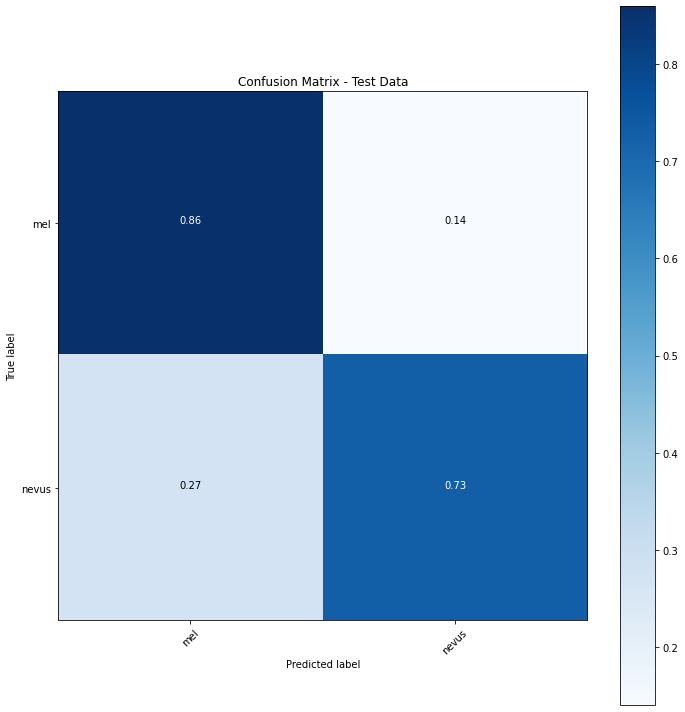

In [28]:
plt.figure(figsize=(10,10))
plot_confusion_matrix(cm1, trainloader.dataset.classes, normalize=True, title="Confusion Matrix - Test Data")

In [29]:

# Calculate image-level ROC AUC score
y_true, y_pred = label_list, pred_list
fpr, tpr, _ = roc_curve(y_true, y_pred)
roc_auc = roc_auc_score(y_true, y_pred)

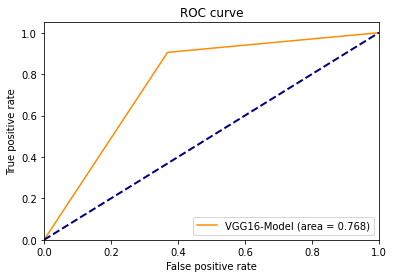

In [30]:
plt.figure(1)
lw = 2
plt.plot(fpr, tpr, color="darkorange", label="VGG16-Model (area = {:.3f})".format(roc_auc))
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#plot training accuracy

x = list(range(1,len(acc_list[:50])+1))
plt.figure(figsize=(12,8))
plt.plot(x, acc_list[:50])
plt.title('Training Accuracy')
plt.xlabel('# of Epochs')
plt.ylabel('Accuracy')
plt.xticks(x, labels=np.arange(1, len(acc_list[:51]), step=1));


In [ ]:

# Plot training loss

x = list(range(1,len(loss_list[:50])+1))
plt.figure(figsize=(12,8))
plt.plot(x, loss_list[:50])
plt.title('Training Loss')
plt.xlabel('# of Epochs')
plt.ylabel('Loss')
plt.xticks(x, labels=np.arange(1, len(loss_list[:51]), step=1));
